In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Levantamos el *dataset*

In [3]:
df = pd.read_csv('train.csv')

In [57]:
df.head(10)

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,is_won
ID,,,,,,,,,,,,,,,,,,,,,
27761,EMEA,NaN,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,NaN,...,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,False
27760,EMEA,NaN,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,NaN,...,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,True
27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,True
16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,False
16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,False
16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,Q1,2018,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None,False
16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,Q1,2017,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None,False
27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,Q1,2016,0,USD,50688.0,USD,50688.0,Closed Won,Prod_Category_A_None,True
24353,Japan,NaN,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,NaN,...,Q1,2016,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None,False


In [58]:
df[["Total_Amount","Total_Taxable_Amount","Opportunity_Name"]].head(10)

,Total_Amount,Total_Taxable_Amount,Opportunity_Name
ID,,,
27761,5272800.0,5272800.0,Opportunity_Name_12598
27760,48230.0,48230.0,Opportunity_Name_12600
27446,83865.6,83865.6,Opportunity_Name_469
16808,7421881.5,7421881.5,Opportunity_Name_415
16805,13357192.5,13357192.5,Opportunity_Name_851
16802,14838277.5,14838277.5,Opportunity_Name_939
16799,2659494.6,2659494.6,Opportunity_Name_1618
27455,50688.0,50688.0,Opportunity_Name_8227
24353,15600.0,470400.0,Opportunity_Name_6151


Vemos el tipo de cada columna

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

Veamos si los ID son únicos, así los podemos usar como clave

In [6]:
df['ID'].value_counts().head()

6141     1
27384    1
21263    1
19212    1
25353    1
Name: ID, dtype: int64

Son únicos porque el mayor es 1. Así que van como clave:

In [7]:
df = df.set_index('ID')
df.head()

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
ID,,,,,,,,,,,,,,,,,,,,,
27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


---
## Limpieza del *dataset*

Por enunciado:

* Hay columnas levantadas como `object` que deberían ser `date`.
* Otras como `int64` que deberían ser `bool`.
* Y otras como `object` que deberían ser `categorical`.

In [8]:
# Las date van directo como lista como parámetro para parse_dates
date_columns = [
                'Account_Created_Date',
                'Opportunity_Created_Date',
                'Quote_Expiry_Date',
                'Last_Modified_Date',
                'Planned_Delivery_Start_Date',
                'Planned_Delivery_End_Date',
]

In [9]:
# El resto va como dict. Las vamos sumando de a uno al dict 'column_types'
bool_columns = [
                'Pricing, Delivery_Terms_Quote_Appr',
                'Pricing, Delivery_Terms_Approved',
                'Bureaucratic_Code_0_Approval',
                'Bureaucratic_Code_0_Approved',
                'Submitted_for_Approval'
]
column_types = {col:'bool' for col in bool_columns}

categorical_columns = [
    'Region',
    'Territory',
    'Bureaucratic_Code',
    'Source ',
    'Billing_Country',
    'Account_Name',
    'Opportunity_Name',
    'Account_Owner',
    'Opportunity_Owner',
    'Account_Type',
    'Opportunity_Type',
    'Quote_Type',
    'Delivery_Terms',
    'Brand',
    'Product_Type',
    'Size',
    'Product_Category_B',
    'Currency',
    'Last_Modified_By',
    'Product_Family',
    'Product_Name',
    'ASP_Currency',
    'ASP_(converted)_Currency',
    'Delivery_Quarter',
    'Total_Amount_Currency',
    'Total_Taxable_Amount_Currency',
    'Stage',
    'Prod_Category_A'
]
column_types.update({col:'category' for col in categorical_columns})

In [10]:
# Excluidos porque son todos None
empty = ['Actual_Delivery_Date', 'Last_Activity']

## Carga y limpieza definitiva del csv
### Columnas a las que les cambiamos el tipo:
* Todas las fechas a `datetime`
* Varios `object` a `categorical`

### Columnas que no levantamos directo:
* `'Actual_Delivery_Date'` como datetime64 (todos nan) -->  `use_cols`
* `'Last_Activity'` como datetime64 (todos nan) --> `use_cols`
* `'Sales_Contract_No'` como int64 (tiene 'None's) --> `fillna(0).astype()`
* `'Price'` como float64 (tiene 'None's) --> `na_values`

In [11]:
df = pd.read_csv('train.csv', parse_dates=date_columns, dtype=column_types,
                 index_col='ID', na_values=['Other', 'NaT', 'None'],
                 usecols=lambda x: x not in empty)

df['Sales_Contract_No'] = df['Sales_Contract_No'].fillna(0).astype(np.int64)
df['Month'] = pd.to_datetime(df['Month'], format='%Y - %m')
df.head()

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
ID,,,,,,,,,,,,,,,,,,,,,
27761,EMEA,NaN,True,True,True,True,False,Bureaucratic_Code_4,2015-06-16,NaN,...,2016-05-01,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
27760,EMEA,NaN,False,False,False,False,False,Bureaucratic_Code_4,2015-06-16,NaN,...,2016-01-01,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
27446,Americas,NW America,False,False,False,False,False,Bureaucratic_Code_4,2015-04-21,Source_7,...,2016-01-01,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
16808,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
16805,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


##### Vemos cómo quedan las columnas:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16947 entries, 27761 to 28318
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Region                              16947 non-null  category      
 1   Territory                           11948 non-null  category      
 2   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  bool          
 3   Pricing, Delivery_Terms_Approved    16947 non-null  bool          
 4   Bureaucratic_Code_0_Approval        16947 non-null  bool          
 5   Bureaucratic_Code_0_Approved        16947 non-null  bool          
 6   Submitted_for_Approval              16947 non-null  bool          
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              7450 non-null   category      
 10  Billing_Country   

---

## Análisis Exploratorio

In [13]:
tomi_subset = df.loc[:,["Quote_Expiry_Date","Last_Modified_Date","Product_Family","Product_Name","ASP_Currency","ASP","ASP_(converted)_Currency","ASP_(converted)","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Month","Delivery_Year","Stage"]]
tomi_subset

,Quote_Expiry_Date,Last_Modified_Date,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Year,Stage
ID,,,,,,,,,,,,,
27761,2016-01-30,2016-06-13,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016-05-01,2016,Closed Lost
27760,2016-01-20,2016-01-15,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016-01-01,2016,Closed Won
27446,2016-09-30,2016-09-29,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016-01-01,2016,Closed Won
16808,NaT,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018-02-01,2018,Closed Lost
16805,2017-06-02,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018-02-01,2018,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8781,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,2016-03-01,2016,Closed Won
8786,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-04-04,2016-04-08,2016-04-01,2016,Closed Won
8792,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-28,2016-03-31,2016-03-01,2016,Closed Won


### Distribución de fechas de entrega


El rango en días en el que se cierra la oportunidad lo calculamos con la fecha de inicio y la fecha de fin planeadas 

In [14]:
tomi_subset["Delivery_Range"] = tomi_subset["Planned_Delivery_End_Date"] - tomi_subset["Planned_Delivery_Start_Date"]
tomi_subset["Delivery_Range"]

ID
27761   60 days
27760    2 days
27446    0 days
16808   58 days
16805   27 days
          ...  
8781     4 days
8786     4 days
8792     3 days
28561    4 days
28318   61 days
Name: Delivery_Range, Length: 16947, dtype: timedelta64[ns]

A falta de los datos de la columna "Actual_Delivery_Date", estimamos una fecha de entrega como la fecha promedio del rango previamente definido.

In [15]:
tomi_subset["Estimated_Delivery_Date"] = tomi_subset["Planned_Delivery_Start_Date"] + (tomi_subset["Delivery_Range"]/2)
tomi_subset

,Quote_Expiry_Date,Last_Modified_Date,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Year,Stage,Delivery_Range,Estimated_Delivery_Date
ID,,,,,,,,,,,,,,,
27761,2016-01-30,2016-06-13,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016-05-01,2016,Closed Lost,60 days,2016-05-31 00:00:00
27760,2016-01-20,2016-01-15,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016-01-01,2016,Closed Won,2 days,2016-01-19 00:00:00
27446,2016-09-30,2016-09-29,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016-01-01,2016,Closed Won,0 days,2016-01-25 00:00:00
16808,NaT,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018-02-01,2018,Closed Lost,58 days,2018-03-02 00:00:00
16805,2017-06-02,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018-02-01,2018,Closed Lost,27 days,2018-02-14 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8781,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,2016-03-01,2016,Closed Won,4 days,2016-03-23 00:00:00
8786,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-04-04,2016-04-08,2016-04-01,2016,Closed Won,4 days,2016-04-06 00:00:00
8792,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-28,2016-03-31,2016-03-01,2016,Closed Won,3 days,2016-03-29 12:00:00


In [16]:
tomi_subset = tomi_subset[tomi_subset["Estimated_Delivery_Date"].dt.year <= 2020]
tomi_subset

,Quote_Expiry_Date,Last_Modified_Date,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Year,Stage,Delivery_Range,Estimated_Delivery_Date
ID,,,,,,,,,,,,,,,
27761,2016-01-30,2016-06-13,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016-05-01,2016,Closed Lost,60 days,2016-05-31 00:00:00
27760,2016-01-20,2016-01-15,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016-01-01,2016,Closed Won,2 days,2016-01-19 00:00:00
27446,2016-09-30,2016-09-29,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016-01-01,2016,Closed Won,0 days,2016-01-25 00:00:00
16808,NaT,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018-02-01,2018,Closed Lost,58 days,2018-03-02 00:00:00
16805,2017-06-02,2018-03-27,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018-02-01,2018,Closed Lost,27 days,2018-02-14 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8781,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,2016-03-01,2016,Closed Won,4 days,2016-03-23 00:00:00
8786,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-04-04,2016-04-08,2016-04-01,2016,Closed Won,4 days,2016-04-06 00:00:00
8792,NaT,2016-01-19,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-28,2016-03-31,2016-03-01,2016,Closed Won,3 days,2016-03-29 12:00:00


In [17]:
# Distribución de los rangos en días por Stage

to_plot = tomi_subset.loc[tomi_subset["Stage"].isin(["Closed Won","Closed Lost"]),["Delivery_Range","Stage"]]
display(to_plot)

won = tomi_subset.loc[tomi_subset["Stage"]=="Closed Won","Delivery_Range"].to_frame()
won
lost = tomi_subset.loc[tomi_subset["Stage"]=="Closed Lost","Delivery_Range"]

#sns.kdeplot(pd.to_numeric(won.dt.days).dropna(), hue = 1)    
#sns.kdeplot(pd.to_numeric(lost.dt.days).dropna(), hue = 2)


    

,Delivery_Range,Stage
ID,,
27761,60 days,Closed Lost
27760,2 days,Closed Won
27446,0 days,Closed Won
16808,58 days,Closed Lost
16805,27 days,Closed Lost
...,...,...
8781,4 days,Closed Won
8786,4 days,Closed Won
8792,3 days,Closed Won


Group:  Closed Lost  - Sample size:  7320
Distribución de Closed Lost en el mes


/home/tomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


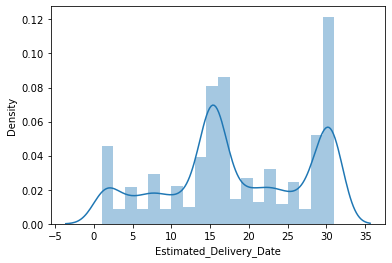

Distribución de Closed Lost en el año por meses


/home/tomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


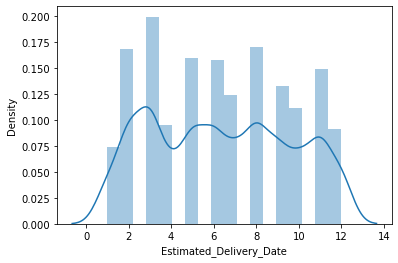

Distribución de Closed Lost en el año por trimestres


/home/tomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


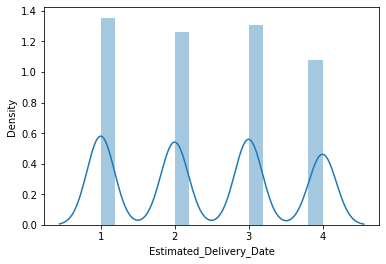

Distribución de Closed Lost histórica


/home/tomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


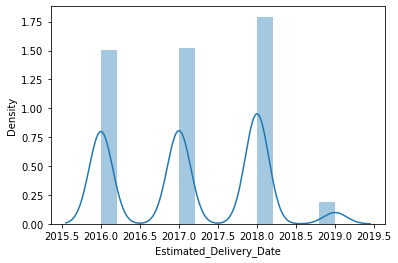

Group:  Closed Won  - Sample size:  9487
Distribución de Closed Won en el mes


/home/tomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


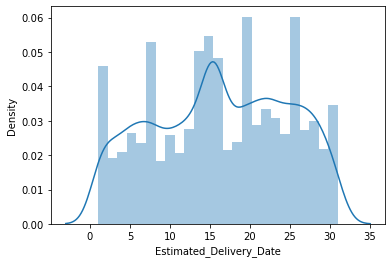

Distribución de Closed Won en el año por meses


/home/tomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


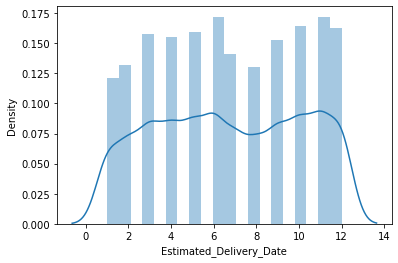

Distribución de Closed Won en el año por trimestres


/home/tomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


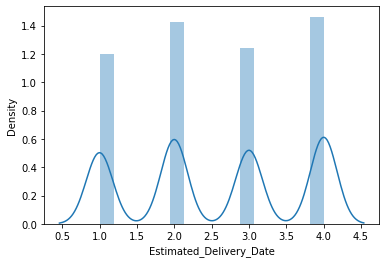

Distribución de Closed Won histórica


/home/tomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


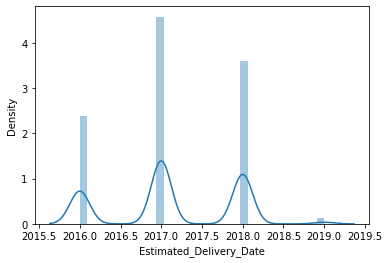

In [18]:
# Distribución de los días del mes en que se estima "Delivery_Date"

selected = ["Closed Lost","Closed Won"]

for name,group in tomi_subset.groupby("Stage")["Estimated_Delivery_Date"]:
    if name not in selected: continue
    
    print("Group: ",name, " - Sample size: ",group.size)
    
    print("Distribución de",name,"en el mes")
    sns.distplot(pd.to_numeric(group.dt.day).dropna(), norm_hist= True)
    plt.show()
    
    print("Distribución de",name,"en el año por meses")
    sns.distplot(pd.to_numeric(group.dt.month).dropna(), norm_hist= True)
    plt.show()
    
    print("Distribución de",name,"en el año por trimestres")
    sns.distplot(pd.to_numeric(group.dt.quarter).dropna(), norm_hist= True)
    plt.show()
    
    print("Distribución de",name,"histórica")
    sns.distplot(pd.to_numeric(group.dt.year).dropna(), norm_hist= True)
    plt.show()
    

Distribución de Estimated_Delivery_Date en el mes


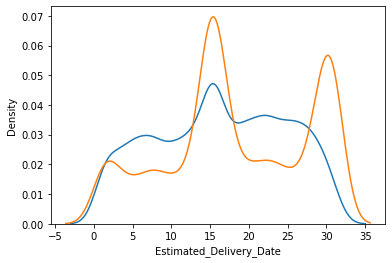

Distribución de Estimated_Delivery_Date en el año por meses


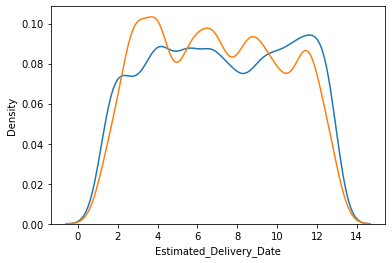

Distribución de Estimated_Delivery_Date en el año por trimestres


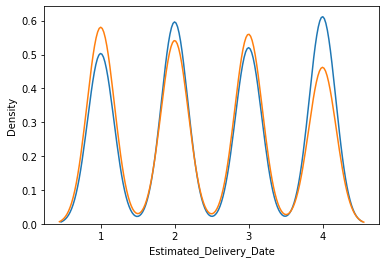

Distribución de Estimated_Delivery_Date histórica


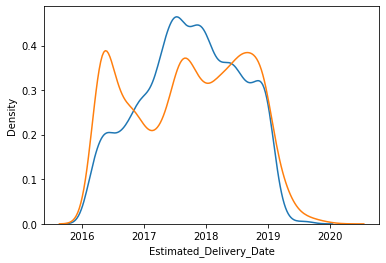

In [19]:
# Distribución de los días del mes en que se estima "Delivery_Date"

won = tomi_subset.loc[tomi_subset["Stage"]=="Closed Won","Estimated_Delivery_Date"]
lost = tomi_subset.loc[tomi_subset["Stage"]=="Closed Lost","Estimated_Delivery_Date"]

print("Distribución de Estimated_Delivery_Date en el mes")
sns.kdeplot(pd.to_numeric(won.dt.day).dropna())
sns.kdeplot(pd.to_numeric(lost.dt.day).dropna())
plt.show()

print("Distribución de Estimated_Delivery_Date en el año por meses")
data = ( pd.to_numeric(won.dt.month) + pd.to_numeric(won.dt.day)/30).dropna()
sns.kdeplot(data)
data = (pd.to_numeric(lost.dt.month) + pd.to_numeric(lost.dt.day)/30).dropna()
sns.kdeplot(data)
plt.show()

print("Distribución de Estimated_Delivery_Date en el año por trimestres")
sns.kdeplot(pd.to_numeric(won.dt.quarter).dropna())
sns.kdeplot(pd.to_numeric(lost.dt.quarter).dropna())

plt.show()

print("Distribución de Estimated_Delivery_Date histórica")
data = (pd.to_numeric(won.dt.year) + pd.to_numeric(won.dt.month)/12 + pd.to_numeric(won.dt.day)/365).dropna()
sns.kdeplot(data)
data = (pd.to_numeric(lost.dt.year) + pd.to_numeric(lost.dt.month)/12 + pd.to_numeric(lost.dt.day)/365).dropna()
sns.kdeplot(data)
plt.show()

# Conociendo un poco más el set

In [20]:
df["Pricing, Delivery_Terms_Approved"] = df["Pricing, Delivery_Terms_Approved"].astype(bool)
grouped = df.groupby("Pricing, Delivery_Terms_Approved").agg({"Stage":"value_counts"})

grouped = grouped.rename(columns= {"Stage":"count"}).unstack().reset_index()
new_columns = ["Pricing","Closed Lost", "Closed Won", "Negotiation", "Proposal", "Qualification"]

#grouped.columns = new_columns
grouped.index

TypeError: cannot insert an item into a CategoricalIndex that is not already an existing category

ValueError: 'label' must be of length 'x'

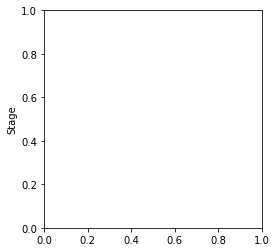

In [22]:
for column in grouped:
    if column is "Pricing": continue
    grouped[column].plot(kind="pie",labels=["Pricing False","Pricing True"],legend=True,colors=["pink","lightgreen"])
    plt.show()

### ¿Todas las mismas opportunity ID tienen un mismo oportunity Name? : Podemos decir que si

In [23]:
df.groupby("Opportunity_ID").agg({"Stage":"count"})["Stage"].nlargest(5)

Opportunity_ID
2008     36
12460    36
5123     26
6606     26
2911     24
Name: Stage, dtype: int64

In [24]:
df.loc[df["Opportunity_ID"] == 2008,"Opportunity_Name"].value_counts()

Opportunity_Name_9795    36
Opportunity_Name_9923     0
Opportunity_Name_2260     0
Opportunity_Name_2268     0
Opportunity_Name_2265     0
                         ..
Opportunity_Name_6362     0
Opportunity_Name_6361     0
Opportunity_Name_6360     0
Opportunity_Name_636      0
Opportunity_Name_0        0
Name: Opportunity_Name, Length: 9841, dtype: int64

### ¿Como evolucionan las Oportunidades en el tiempo? ¿Qué columnas cambian en cada actualizacion?

In [25]:
# Cambio las columnas boleanas a numéricas
df= df.astype({x:"int" for x in bool_columns})
df.head()

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
ID,,,,,,,,,,,,,,,,,,,,,
27761,EMEA,NaN,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,NaN,...,2016-05-01,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
27760,EMEA,NaN,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,NaN,...,2016-01-01,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,2016-01-01,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [26]:
# Definimos una funcion que lo que hace es tomar una serie y 
# devolver la cantidad de valores no repetidos que toma.

def count_values(serie):
    return serie.drop_duplicates().size

In [27]:
# Definimos una serie con transform donde por cada oportunidad cuenta los registros que hay

regsByOp = df.groupby("Opportunity_ID")["Stage"].transform("count")
regsByOp

ID
27761    1
27760    1
27446    1
16808    1
16805    1
        ..
8781     3
8786     3
8792     3
28561    1
28318    1
Name: Stage, Length: 16947, dtype: int64

In [28]:
ColumnActivityByOp = df[regsByOp > 1].groupby("Opportunity_ID").agg(count_values)
ColumnActivityByOp

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
Opportunity_ID,,,,,,,,,,,,,,,,,,,,,
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,5.0,1,1.0,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,5.0,1,1.0,1,1
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,5.0,1,1.0,1,1
13,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,6.0,1,1.0,1,1
14,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,6.0,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12785,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,3.0,1,1.0,1,1
12796,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2.0,1,1.0,1,1
12797,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,3.0,1,1.0,1,1


In [29]:
# Las columnas cuyo valor ha cambiado un valor maximo de veces, en una misma Op_ID

columnValuesByOp = ColumnActivityByOp.apply("max")
columnValuesByOp = columnValuesByOp[columnValuesByOp > 1]
columnValuesByOp = columnValuesByOp.sort_values(ascending=False)
columnValuesByOp

Product_Name                   36.0
Product_Family                 36.0
Total_Amount                   34.0
Planned_Delivery_End_Date      14.0
Planned_Delivery_Start_Date    13.0
Month                          12.0
ASP_(converted)                 8.0
ASP                             8.0
TRF                             7.0
Delivery_Quarter                4.0
Delivery_Year                   2.0
dtype: float64

In [30]:
# Las Op_Id que registran un maximo numero de cambios en alguna columna

maxColumnChanges = ColumnActivityByOp.agg("max",axis= 1)
maxColumnChanges

Opportunity_ID
8        5.0
9        5.0
10       5.0
13       6.0
14       6.0
        ... 
12785    3.0
12796    2.0
12797    3.0
12800    2.0
12801    3.0
Length: 2920, dtype: float64

In [31]:
OpID_cambiantes = maxColumnChanges[maxColumnChanges>1]
OpID_cambiantes

Opportunity_ID
8        5.0
9        5.0
10       5.0
13       6.0
14       6.0
        ... 
12785    3.0
12796    2.0
12797    3.0
12800    2.0
12801    3.0
Length: 2869, dtype: float64

In [56]:
# Ejemplo: La Opportunity_ID = 12796 parece en la lista 'maxColumnChanges' entonces 
#          debe aparecer por lo menos 2 veces en el df original y la diferencia debe estar
#          en alguna o varias columnas previamente enlistadas.

df.loc[df["Opportunity_ID"] == 12796,"Total_Amount"] 

ID
15848    56350.0
15853    56160.0
Name: Total_Amount, dtype: float64

#### Visualizacion en ScatterPlot

Se busca un scatterplot en el que cada punto represente un usuario (eje x), una columna (eje y), el numero de valores actualizados (color) y el stage (forma).

In [122]:
to_plot = ColumnActivityByOp.unstack().to_frame().reset_index()
to_plot = pd.merge(to_plot,df.loc[:,["Opportunity_ID","Stage"]],on = "Opportunity_ID", how = "inner")
to_plot = to_plot.rename(columns={"level_0":"column",0:"reps"})
to_plot = to_plot.loc[to_plot["column"].isin(columnValuesByOp.index)]
to_plot.drop_duplicates(inplace=True)
to_plot

,column,Opportunity_ID,reps,Stage
150,Product_Family,8,5.0,Closed Lost
155,Product_Name,8,5.0,Closed Lost
165,ASP,8,2.0,Closed Lost
175,ASP_(converted),8,2.0,Closed Lost
180,Planned_Delivery_Start_Date,8,1.0,Closed Lost
...,...,...,...,...
481218,Month,12801,2.0,Closed Won
481221,Delivery_Quarter,12801,2.0,Closed Won
481224,Delivery_Year,12801,1.0,Closed Won
481227,TRF,12801,1.0,Closed Won


In [123]:
to_plot = to_plot.loc[to_plot["reps"]>1]
to_plot["size"] = to_plot.groupby(["column","reps"])["Stage"].transform("count")
to_plot

/home/tomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,column,Opportunity_ID,reps,Stage,size
150,Product_Family,8,5.0,Closed Lost,175
155,Product_Name,8,5.0,Closed Lost,180
165,ASP,8,2.0,Closed Lost,1708
175,ASP_(converted),8,2.0,Closed Lost,1708
215,Total_Amount,8,5.0,Closed Lost,190
...,...,...,...,...,...
481212,Planned_Delivery_Start_Date,12801,3.0,Closed Won,147
481215,Planned_Delivery_End_Date,12801,3.0,Closed Won,157
481218,Month,12801,2.0,Closed Won,435
481221,Delivery_Quarter,12801,2.0,Closed Won,296


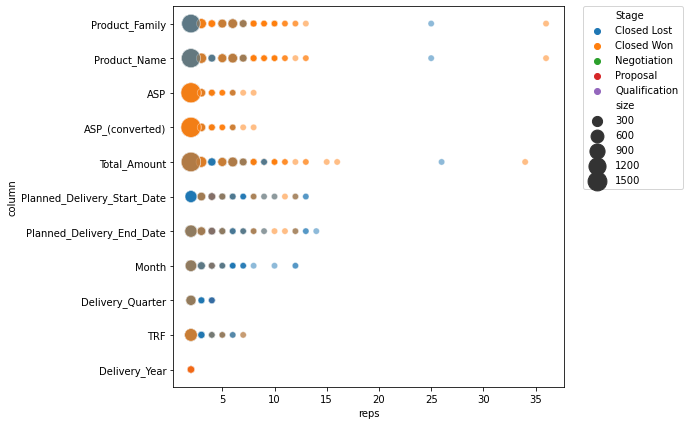

In [133]:
plt.rcParams['figure.figsize'] = 7,7


sns.scatterplot(data=to_plot, x="reps",y ="column",hue="Stage", size="size",alpha = 0.5,sizes=(40, 400))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [36]:
df.groupby("Opportunity_ID").agg({"Product_Family":count_values}).nlargest(1,"Product_Family")

,Product_Family
Opportunity_ID,
2008,36


In [37]:
selected = ColumnActivityByOp.filter(OpID_cambiantes,axis=0).filter(items= columnValuesByOp.index).reset_index()
selected = pd.merge(selected,df.reset_index().loc[:,["Opportunity_ID","Stage"]],on = "Opportunity_ID", how = "left")
selected

,Opportunity_ID,Product_Name,Product_Family,Total_Amount,Planned_Delivery_End_Date,Planned_Delivery_Start_Date,Month,ASP_(converted),ASP,TRF,Delivery_Quarter,Delivery_Year,Stage
0,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
1,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
2,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
3,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
4,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
388,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
389,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost
390,8.0,5,5,5.0,1,1,1,2.0,2.0,1,1,1,Closed Lost


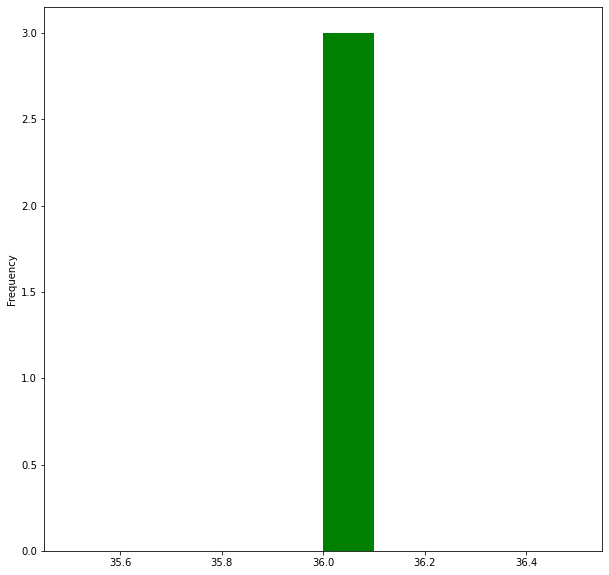

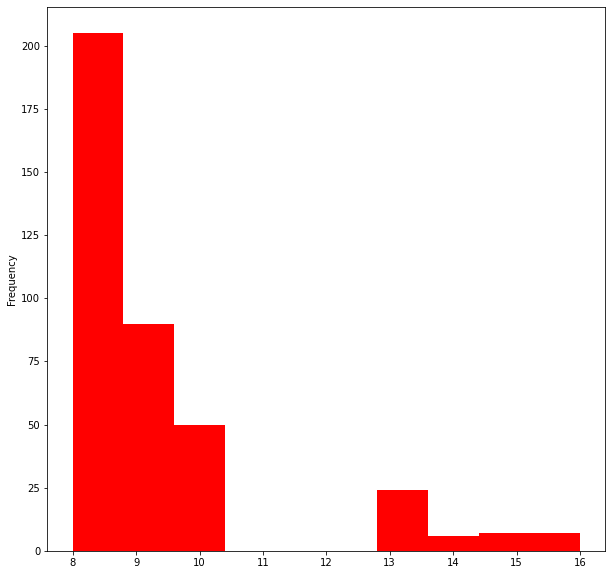

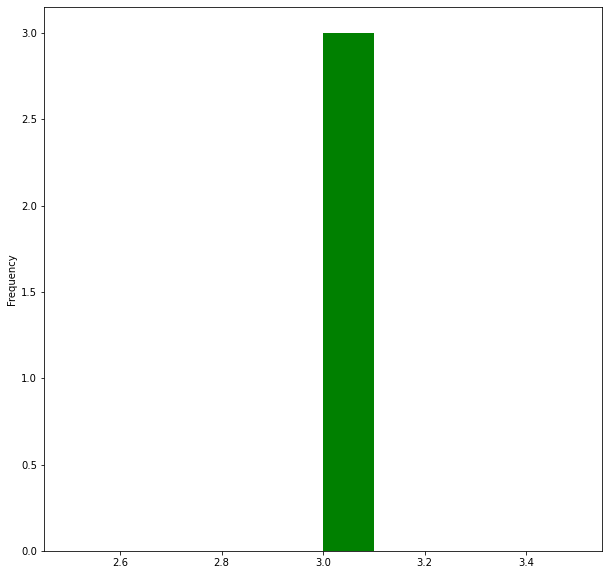

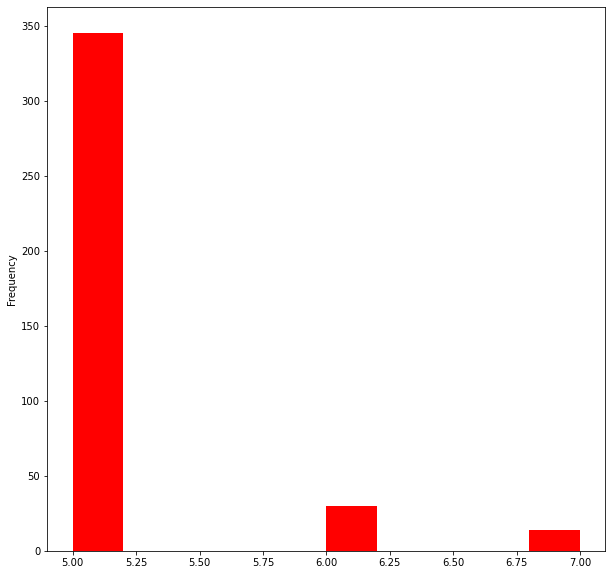

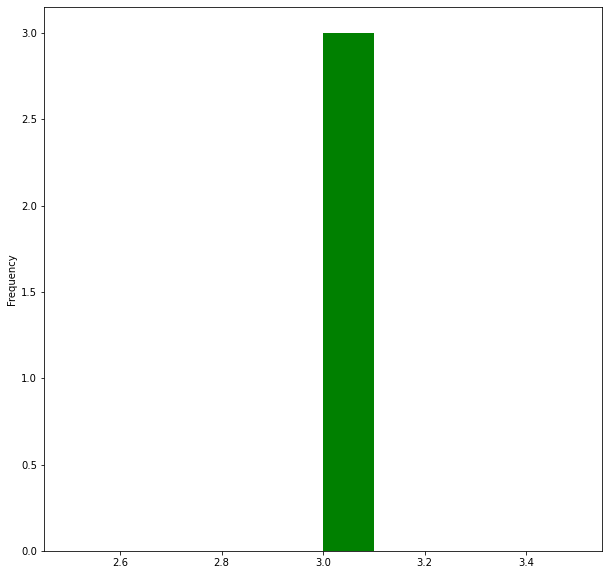

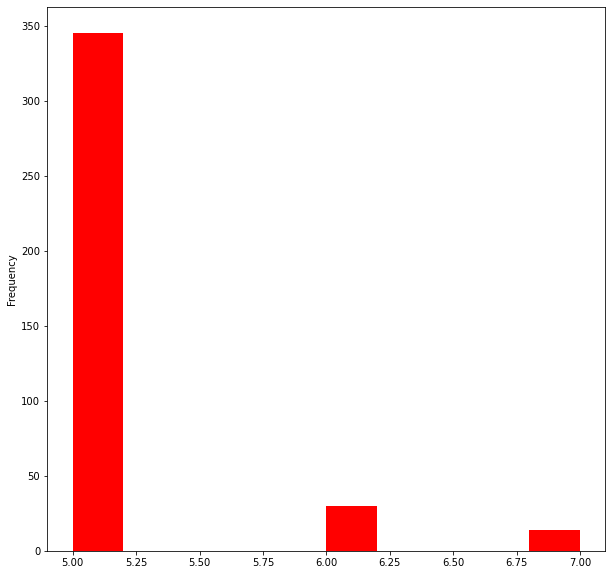

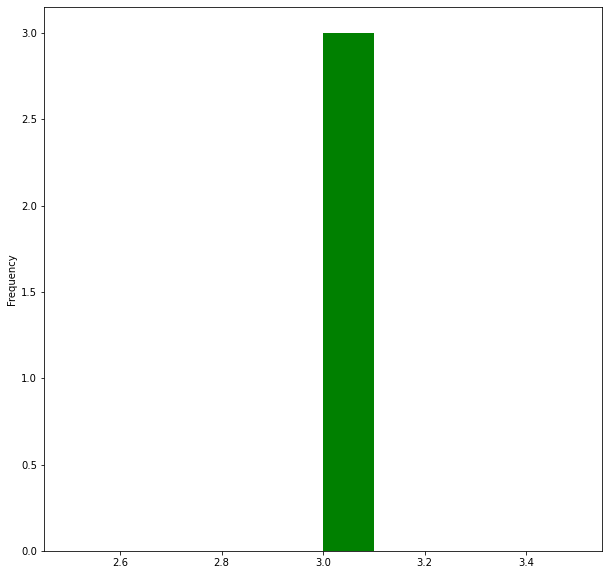

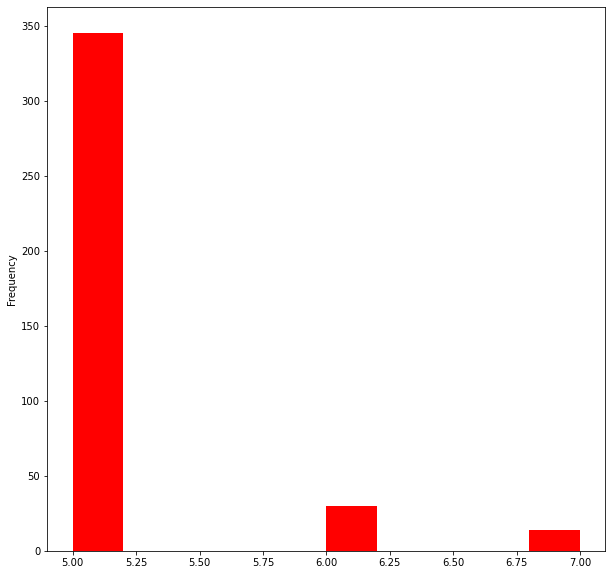

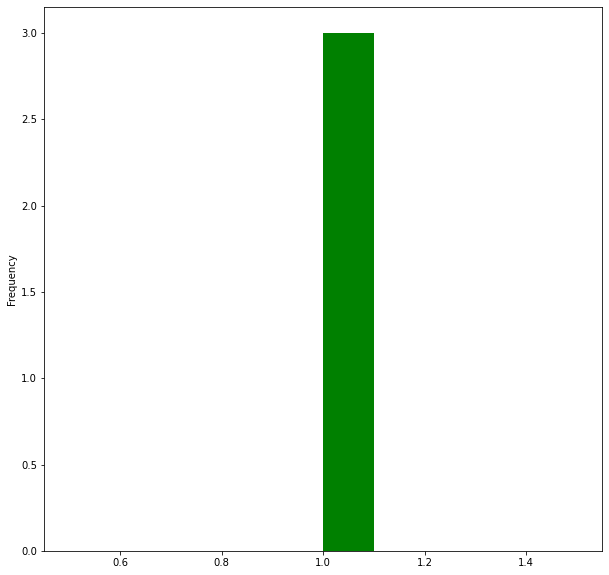

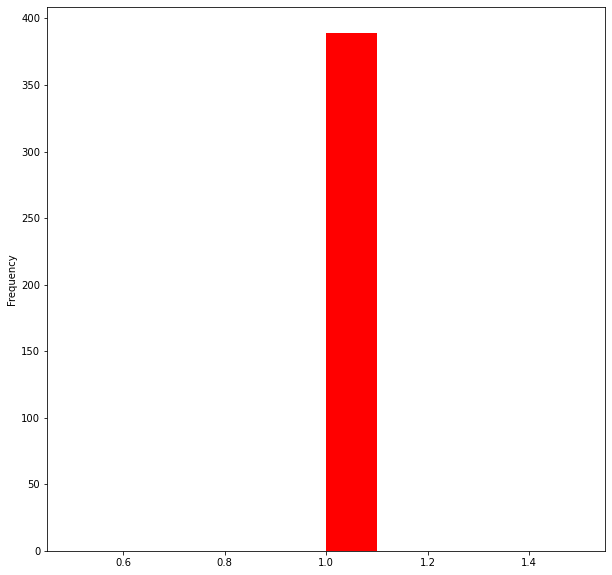

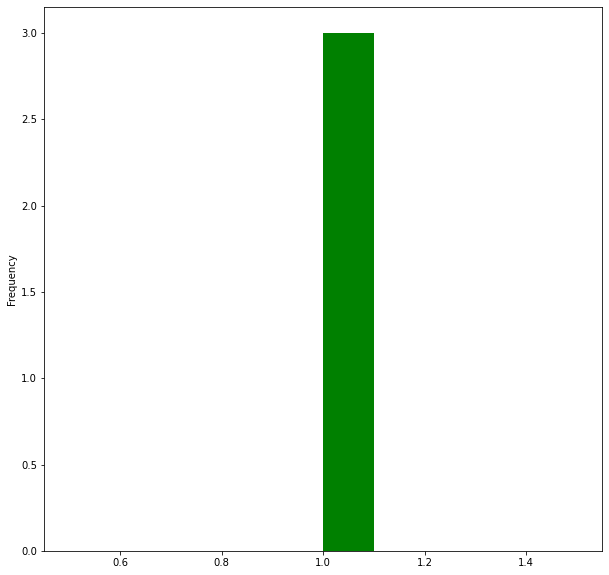

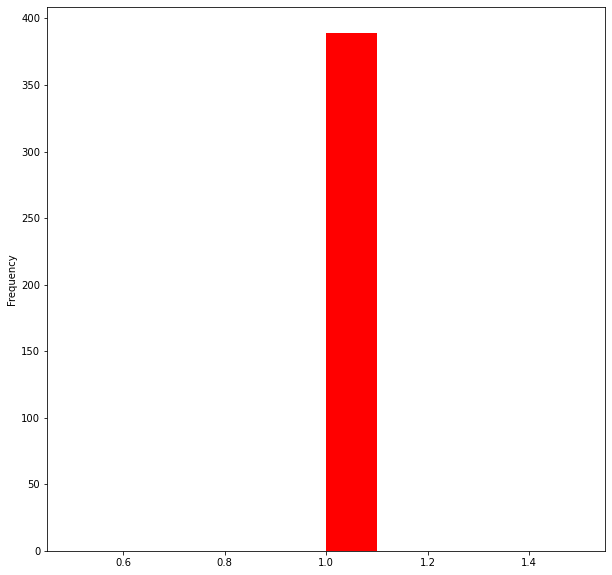

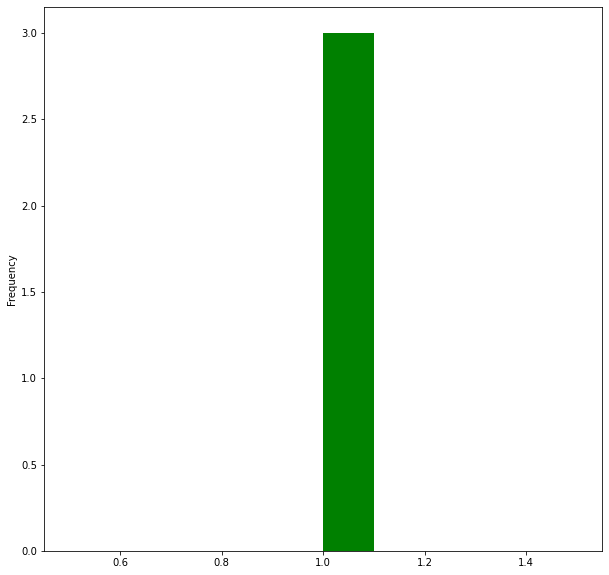

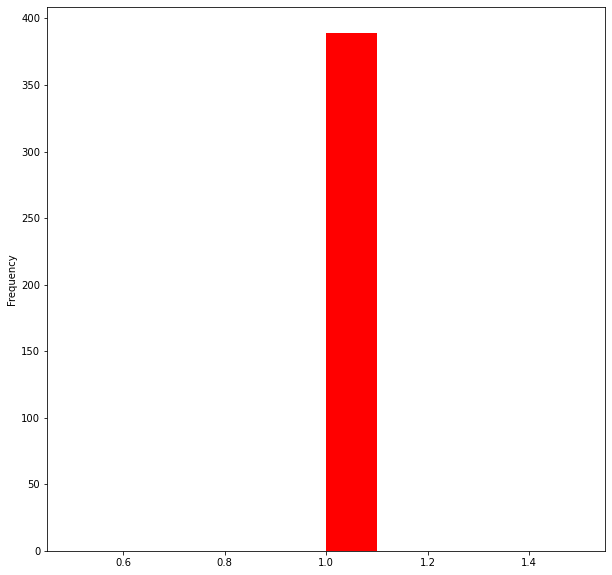

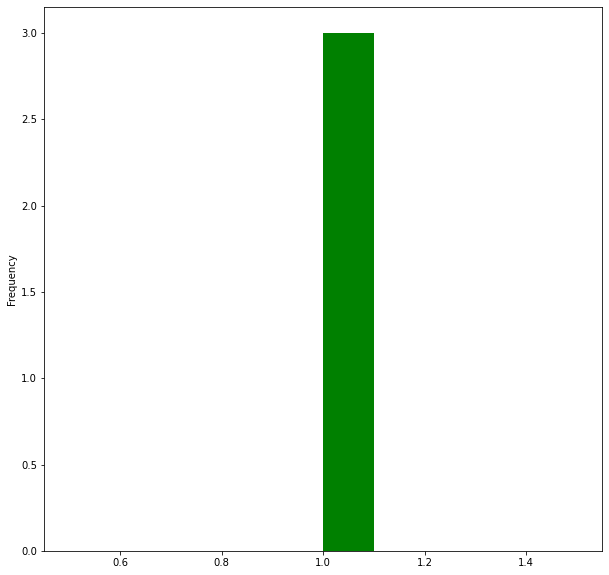

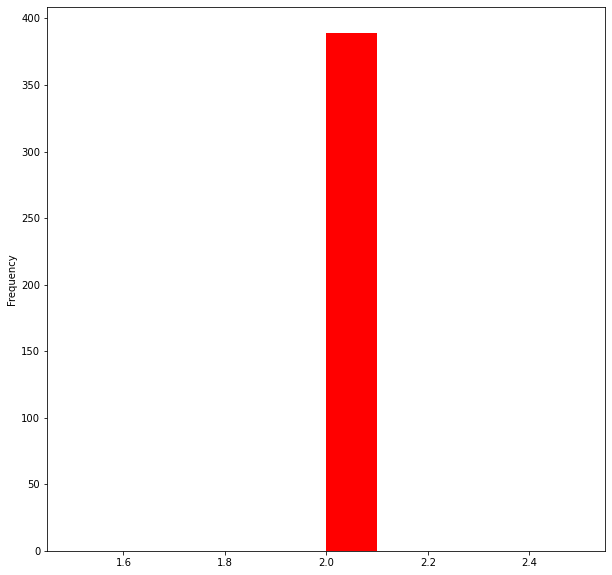

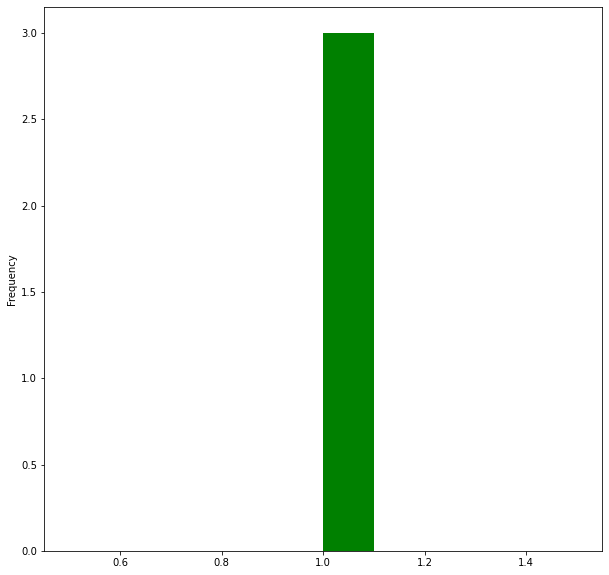

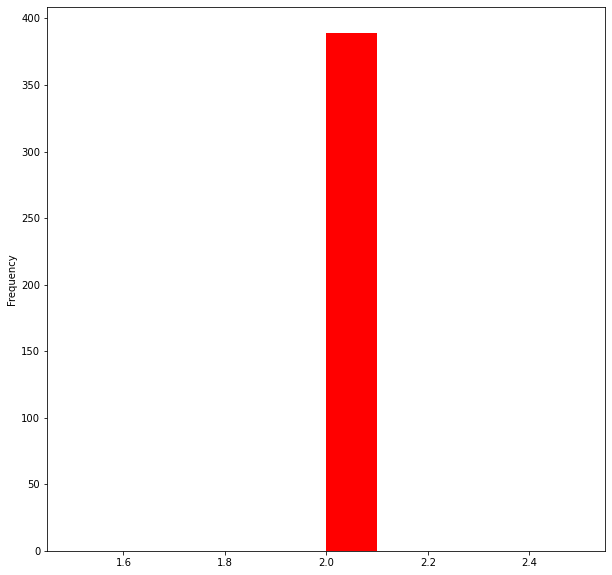

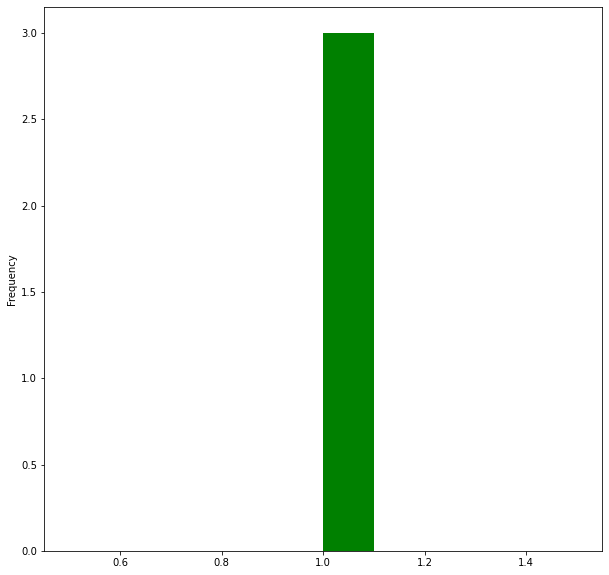

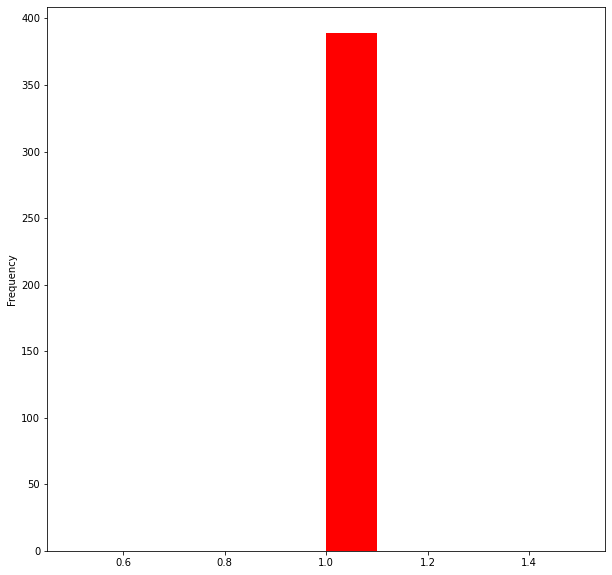

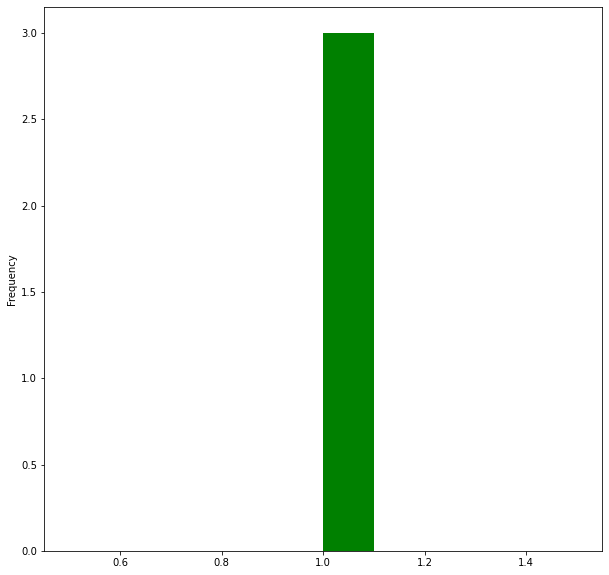

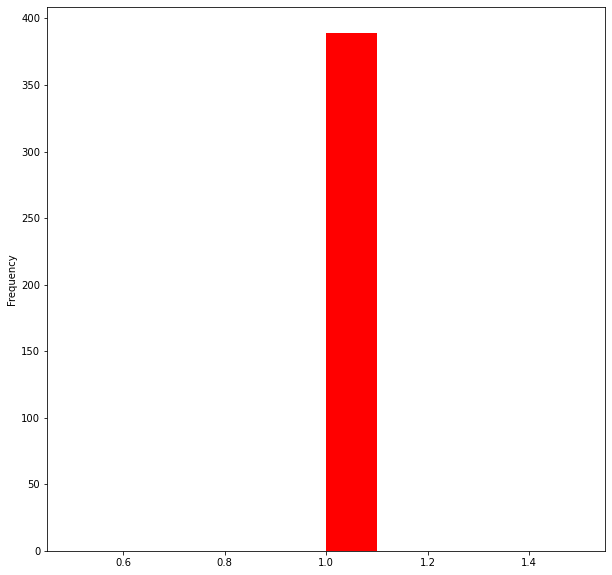

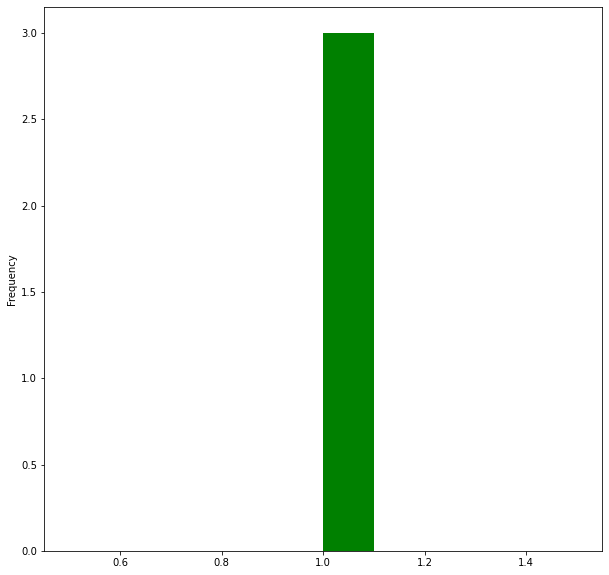

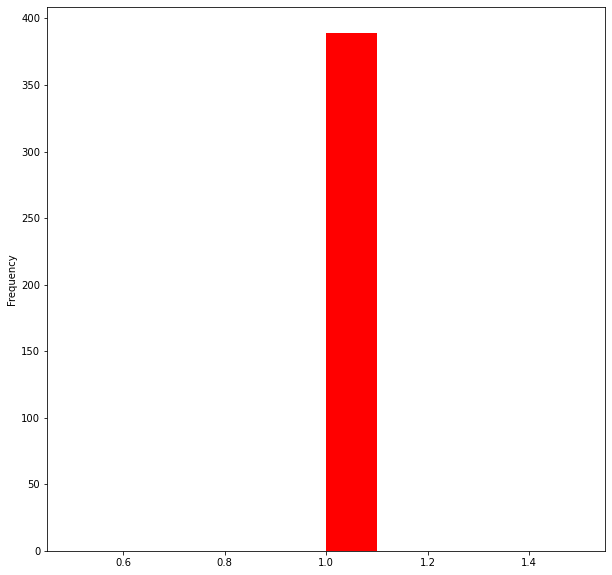

TypeError: no numeric data to plot

In [38]:
for column in selected:
    is_won = selected["Stage"] == "Closed Won"
    reselected = selected.loc[is_won,column]
    reselected.plot.hist(color="green")
    plt.show()
    reselected = selected.loc[ is_won == False,column]
    reselected.plot.hist(color="red")
    plt.show()

### Rainplot de repeticiones de las columnas con altos valores de rep.

In [ ]:
to_plot = ColumnActivityByOp


to_plot = pd.merge(to_plot,df.loc[:,["Opportunity_ID","Stage"]],on = "Opportunity_ID", how = "left")

to_plot = to_plot.drop_duplicates()
to_plot = to_plot[to_plot["Stage_y"].isin(["Closed Lost","Closed Won"])]
to_plot

In [ ]:
for columna in columnValuesByOp.index:
    #sns.kdeplot(data=to_plot,x= columna ,hue="Stage_y")
    #sns.displot(to_plot, x=columna, kde=True ,hue="Stage_y",legend = ["Closed Lost","Closed Won"])
    sns.kdeplot(data=to_plot, x=columna,hue="Stage_y")

    plt.show()

## Word Cloud

In [ ]:
library(wordcloud)


In [ ]:
df

In [ ]:
grouped = df.groupby(["Stage"]).agg({"Territory":"value_counts"})
grouped.columns=["frequency"]
grouped.reset_index(inplace=True)
grouped = grouped.loc[grouped["Stage"].isin(["Closed Lost","Closed Won"])]
grouped


In [ ]:
grouped["Territory"] = grouped["Territory"].replace(to_replace='None', value=np.nan).dropna()
grouped["Territory"].replace("NW America","NWAmerica",inplace=True)
grouped["Territory"].replace("NE America", "NEAmerica",inplace=True)
grouped["Territory"].replace("SW America", "SWAmerica",inplace=True)
grouped["Territory"].replace("SE America", "SEAmerica",inplace=True)


toplot = grouped[grouped["frequency"]>200]
toplot

In [ ]:
toplot.groupby("Territory").agg({"frequency":"mean"})

In [ ]:
import wordcloud
from wordcloud import WordCloud , STOPWORDS

In [ ]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = """The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(text.lower())

color_to_words = {}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:

closes_won = df.loc[:,'Territory']

new = closes_won.replace(to_replace='None', value=np.nan).dropna()
new.replace("NW America","NWAmerica",inplace=True)
new.replace("NE America", "NEAmerica",inplace=True)
new.replace("SW America", "SWAmerica",inplace=True)
new.replace("SE America", "SEAmerica",inplace=True)

text = ' '.join(new)

default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

wordcloud2 = WordCloud(width=3000, height=900, margin=0,collocations=False).generate(text)

wordcloud2.recolor(color_func=grouped_color_func)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Territorios mas influyentes')
plt.show()

In [ ]:
color_to_words = { "green":[],
                  "red": []}

In [ ]:
for index,row in toplot.iterrows():
    if row["Stage"] == "Closed Won":
        color_to_words["green"].append(row["Territory"])
        
    if row["Stage"] == "Closed Lost":
        color_to_words["red"].append(row["Territory"])

color_to_words
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

wordcloud2 = WordCloud(width=3000, height=900, margin=0,collocations=False).generate(text)

wordcloud2.recolor(color_func=grouped_color_func)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Territorios mas influyentes')
plt.show()

### Se buscara relaciones entre el ASP converted y el Stage

In [ ]:
selected = df.loc[df["ASP_(converted)"] < 1]

sns.histplot(selected,x="ASP_(converted)",hue="Stage",bins= 30)


In [ ]:
target = "Closed Won"

target_df = df.loc[df["Stage"] == target,["ASP_(converted)","Stage"]].rename(columns = {"ASP_(converted)":"ASP"})
no_target_df = df.loc[df["Stage"] != target,["ASP_(converted)","Stage"]].rename(columns = {"ASP_(converted)":"ASP"})

selected = target_df.loc[df["ASP"] < 2]
sns.displot(selected["ASP"],color="lightgreen")

selected = no_target_df.loc[df["ASP"] < 2]
sns.displot(selected["ASP"],color="pink")
plt.show()

In [ ]:
target = "Closed Won"

target_df = df.loc[df["Stage"] == target,["ASP_(converted)","Stage"]].rename(columns = {"ASP_(converted)":"ASP"})
no_target_df = df.loc[df["Stage"] != target,["ASP_(converted)","Stage"]].rename(columns = {"ASP_(converted)":"ASP"})

selected = target_df.loc[df["ASP"] < 1]
sns.kdeplot(selected["ASP"],color="lightgreen")

selected = no_target_df.loc[df["ASP"] < 1]
sns.kdeplot(selected["ASP"],color="pink")
plt.show()

### Se buscara relaciones entre el ASP converted y el Stage

In [ ]:
selected = df.loc[df["ASP_(converted)"] < 1]

sns.histplot(selected,x="ASP_(converted)",hue="Stage",bins= 30)


In [ ]:
target = "Closed Won"

target_df = df.loc[df["Stage"] == target,["ASP_(converted)","Stage"]].rename(columns = {"ASP_(converted)":"ASP"})
no_target_df = df.loc[df["Stage"] != target,["ASP_(converted)","Stage"]].rename(columns = {"ASP_(converted)":"ASP"})

selected = target_df.loc[df["ASP"] < 2]
sns.displot(selected["ASP"],color="lightgreen")

selected = no_target_df.loc[df["ASP"] < 2]
sns.displot(selected["ASP"],color="pink")
plt.show()

In [ ]:
target = "Closed Won"

target_df = df.loc[df["Stage"] == target,["ASP_(converted)","Stage"]].rename(columns = {"ASP_(converted)":"ASP"})
no_target_df = df.loc[df["Stage"] != target,["ASP_(converted)","Stage"]].rename(columns = {"ASP_(converted)":"ASP"})

selected = target_df.loc[df["ASP"] < 1]
sns.kdeplot(selected["ASP"],color="lightgreen")

selected = no_target_df.loc[df["ASP"] < 1]
sns.kdeplot(selected["ASP"],color="pink")
plt.show()

## Buscando otros features

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16947 entries, 27761 to 28318
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Region                              16947 non-null  category      
 1   Territory                           11948 non-null  category      
 2   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 3   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 4   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 5   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 6   Submitted_for_Approval              16947 non-null  int64         
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              7450 non-null   category      
 10  Billing_Country   

In [40]:
# Elegimos la columna "Opportunity_Type" para observar los valores
df["Opportunity_Type"].value_counts()

Opportunity_Type_1     6819
Opportunity_Type_7     5763
Opportunity_Type_19    1900
Opportunity_Type_8     1458
Opportunity_Type_12     279
Opportunity_Type_3      275
Opportunity_Type_20     175
Opportunity_Type_2       70
Opportunity_Type_4       51
Opportunity_Type_10      34
Opportunity_Type_9       23
Opportunity_Type_14      15
Opportunity_Type_5       14
Opportunity_Type_18      11
Opportunity_Type_22      10
Opportunity_Type_15       9
Opportunity_Type_0        8
Opportunity_Type_17       8
Opportunity_Type_21       6
Opportunity_Type_23       5
Opportunity_Type_16       4
Opportunity_Type_13       4
Opportunity_Type_11       3
Opportunity_Type_6        2
Opportunity_Type_24       1
Name: Opportunity_Type, dtype: int64

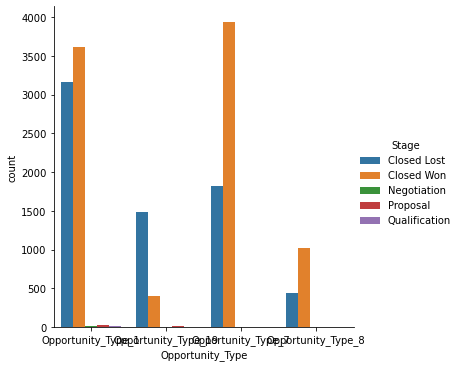

In [41]:
# Tomamos los 4 primeros que son los más relevantes
types = df["Opportunity_Type"].value_counts().nlargest(4).index

to_plot = df.loc[df["Opportunity_Type"].isin(types),["Opportunity_Type","Stage"]]
to_plot["Opportunity_Type"] = to_plot["Opportunity_Type"].astype(object)


sns.catplot(x="Opportunity_Type", hue="Stage", kind="count", data=to_plot)

In [42]:
# Elegimos la columna "Bureaucratic_Code" para observar los valores
df["Bureaucratic_Code"].value_counts()

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [43]:
# Tomamos los 4 primeros que son los más relevantes

types = df["Opportunity_Type"].value_counts().nlargest(4).index

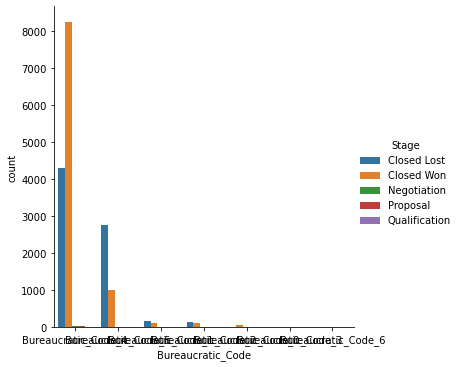

In [44]:
to_plot = df.loc[:,["Bureaucratic_Code","Stage"]]
to_plot["Bureaucratic_Code"] = to_plot["Bureaucratic_Code"].astype(object)

sns.catplot(x="Bureaucratic_Code", hue="Stage", kind="count", data=to_plot)

In [ ]:
df.Prod_Category_A.value_counts()

In [ ]:
df.Product_Category_B.value_counts()

In [52]:
df["is_won"] = df["Stage"] == "Closed Won"
df["is_won"]

ID
27761    False
27760     True
27446     True
16808    False
16805    False
         ...  
8781      True
8786      True
8792      True
28561    False
28318    False
Name: is_won, Length: 16947, dtype: bool

In [146]:
combinations = ["Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved","Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved"]

grouped = df.groupby(combinations).agg({"is_won":["value_counts"]})
grouped

is_won
                                                                                                                                     value_counts
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved is_won             
0                                  0                                0                            0                            True           2113
                                                                                                                              False          1124
                                                                    1                            0                            False             4
                                                                                                                              True              4
                                                                                                 1                            False             8
                                                                                                                              True              1
1                                  0                                0                            0                            False          1046
                                                                                                                              True            327
                                                                    1                            0                            False          1739
                                                                                                                              True            673
                                                                                                 1                            True             11
                                                                                                                              False             7
                                   1                                0                            0                            True           3488
                                                                                                                              False           791
                                                                    1                            0                            False           124
                                                                                                                              True            110
                                                                                                 1                            True           2806
                                                                                                                              False          2571

In [151]:
""" La idea era hacer una funcion que calcule todas las combinaciones de groupBy posible con las columas de 
    arriba y obtener una métrica para saber cuál de todas las combinaciones "habla" más sobre el target
    
   (Pero creo que le pifie con la métrica. No se si funca
   )

"""

class MultyGroupby:
    
    def __init__(self):
        self.bestScore = 9999
        self.bestGrouped = None
        self.grouped = None
        
        
        self.target = ""
        self.df = None
        self.counter = 0

    def grouper(self, all_columns, ordered_columns):

            if len(all_columns) <= 0:
                print("eRROR")
                return

            if len(all_columns) is len(ordered_columns):
                
                self.counter += 1
                
                grouped = self.df.groupby(ordered_columns).agg({self.target:"std"})
                score = round(grouped[self.target].mean(),3)
                
                if score < self.bestScore:
                    self.bestGrouped = list(ordered_columns)
                    self.bestScore = score
                    print("New score ",self.bestScore, "at combination: ", ordered_columns)
                    
                return

            for column in all_columns:
                if column in ordered_columns: continue
                    
                ordered_columns.append(column)
                self.grouper(all_columns, ordered_columns)
                ordered_columns.remove(column)
                
            
            return


multygroupby = MultyGroupby()
multygroupby.df = df.loc[:, combinations + ["is_won"]]
multygroupby.target = "is_won"

multygroupby.counter = 0
multygroupby.grouper(combinations,[])
print("Taked",multygroupby.counter,"iterations..")


New score  0.456 at combination:  ['Pricing, Delivery_Terms_Quote_Appr', 'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval', 'Bureaucratic_Code_0_Approved']
Taked 24 iterations..
